In [0]:
pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 38kB/s 
     |████████████████████████████████| 3.8MB 27.2MB/s 
     |████████████████████████████████| 450kB 42.8MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__) 

2.0.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [0]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Counting objects: 100% (27577/27577), done.
remote: Compressing objects: 100% (27576/27576), done.
remote: Total 27577 (delta 3), reused 27565 (delta 0), pack-reused 0
Receiving objects: 100% (27577/27577), 331.67 MiB | 48.11 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [0]:
img_width = 64
img_height = 64


In [0]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [0]:
train_data_generator = datagen.flow_from_directory(
    directory = '/content/Malaria-Classification-Using-CNN/malaria-dataset',
    target_size = (img_width,img_height),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'training'  
)

Found 22048 images belonging to 2 classes.


In [0]:
validation_data_generator = datagen.flow_from_directory(
    directory = '/content/Malaria-Classification-Using-CNN/malaria-dataset',
    target_size = (img_width,img_height),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'validation'
)

Found 5510 images belonging to 2 classes.


In [0]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## building a CNN

In [0]:
model = Sequential()

model.add(Conv2D(16,(3,3),input_shape = (64,64,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [0]:
model.compile(optimizer=Adam(lr = 0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])

** we can see that instead of actual train, test data we have data generators which generate data from particular directory in required resolution. Hence for this data we fit the model like this **

In [0]:
history = model.fit_generator(generator = train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
1378/1378 [==============================] - 172s 125ms/step - loss: 0.6347 - accuracy: 0.6376 - val_loss: 0.5947 - val_accuracy: 0.6915
Epoch 2/5
1378/1378 [==============================] - 171s 124ms/step - loss: 0.5827 - accuracy: 0.6978 - val_loss: 0.5474 - val_accuracy: 0.7408
Epoch 3/5
1378/1378 [==============================] - 170s 123ms/step - loss: 0.5458 - accuracy: 0.7326 - val_loss: 0.4968 - val_accuracy: 0.7980
Epoch 4/5
1378/1378 [==============================] - 168s 122ms/step - loss: 0.4864 - accuracy: 0.7800 - val_loss: 0.4085 - val_accuracy: 0.8604
Epoch 5/5
1378/1378 [==============================] - 168s 122ms/step - loss: 0.3974 - accuracy: 0.8381 - val_loss: 0.3006 - val_accuracy: 0.8838


In [0]:
history.history

{'accuracy': [0.6375635, 0.6977504, 0.73258346, 0.7800254, 0.8380805],
 'loss': [0.6346807673638376,
  0.5826530120455821,
  0.5458199092455976,
  0.48644471338291817,
  0.39743835116764975],
 'val_accuracy': [0.69147, 0.74083483, 0.7980036, 0.86043555, 0.88384753],
 'val_loss': [0.5946836243505064,
  0.5473777718302132,
  0.4967703629231107,
  0.40846210869326105,
  0.30056802053814347]}

In [0]:
def plot_curve(history):
  epoch_range =range(1,6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper right")
  plt.show()

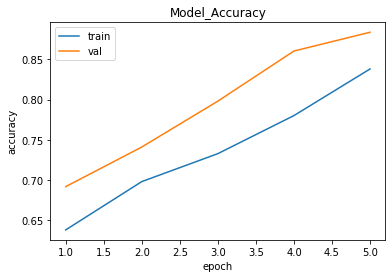

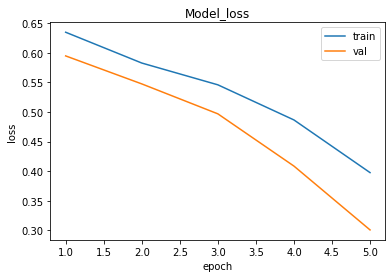

In [0]:
plot_curve(history)

in first fig the blue line is too below the yellow. That means the model is underfitting and should be trained more